# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Naive Bayes Lab
Week 8 | Lab 2.2

In [120]:
from sklearn import naive_bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score


### Load the data 

We're going to use The Adult Income Dataset on the UCI Machine Learning Repository; taken from US Census information and formatted to study the features/regressors/predictors that go into determining whether an adult US resident is 'likely' to have a household income greater than \$50,000. The data includes age, workclass, a weighting variable to account for the unbalanced sampling, education level, time spent in education (in years), marital status, occupation, relationship, race, sex, individual residency, and a target column that indicates whether the person attained a household income greater than \$50,000.

Load the adult data set. There are no column labels in the csv. I've assigned them for you here but you should read the docs for the data set here: https://archive.ics.uci.edu/ml/datasets/adult, and check that makes sense (there seem to be some issues accessing UCI website lately so that's why I've set the columns here so you don't have to check if it isn't working).

In [2]:
adult_dat = pd.read_csv("./assets/datasets/adult_data.csv", names=["Age", "Workclass", "fnlwgt", 
                                                                   "Education", "Education-Num", "Martial Status",
                                                                    "Occupation", "Relationship", "Race", "Sex", 
                                                                   "Capital Gain", "Capital Loss", 
                                                                   "Hours per week", "Country", "Target"])
adult_dat.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Convert the categorical variables into unordered integer values

For us to use the scikit-learn implementation of Naive Bayes, we must pass in numerical data. Since we have decided to analyse all unordered categorical values, we can do a dummy encoding (could also do one-hot-encoding, take a look at the docs if you are interested).

In [40]:
# Perform dummify
df = adult_dat[['Age','fnlwgt','Education-Num','Capital Gain','Capital Loss','Hours per week']]
for col in adult_dat[['Workclass','Education','Martial Status','Occupation','Race','Sex','Country']]:
    df = pd.concat([df,pd.get_dummies(adult_dat[col])],axis=1)
# Clean up the data set by deleting un-used columns

In [41]:
df.shape

(32561, 102)

### Summarise the data and engage in elementary data exploration

For some data exploration, use Pandas histogram methods to display the features. 

In [48]:
# Write histogram functions here, and/or any other data visualizations
def hist_plot(col):
    plt.figure()
    col.plot(kind='hist',alpha=.5)
    plt.show()

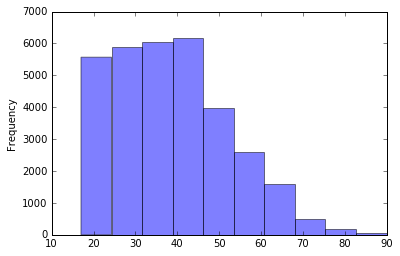

In [49]:
hist_plot(df['Age'])

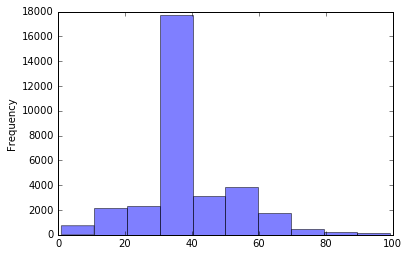

In [50]:
hist_plot(df['Hours per week'])

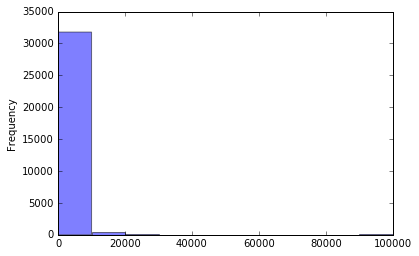

In [51]:
hist_plot(df['Capital Gain'])

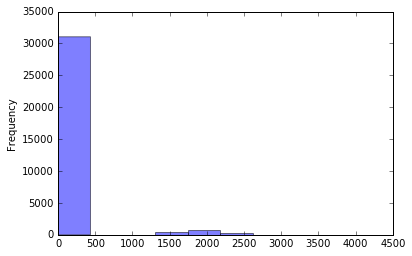

In [52]:
hist_plot(df['Capital Loss'])

### Define your feature set and define your target, including train-test split

In [58]:
X = df
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(adult_dat.Target)
y = le.transform(adult_dat.Target)

In [59]:
le.classes_

array([' <=50K', ' >50K'], dtype=object)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

### Run Naive Bayes Classifier

Instantiate the Naive Bayes predictor from scikit-learn with the training data. Which sklearn implementation makes sense for this data? Have a look at the docs.

In [78]:
nb = naive_bayes.MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Check Accuracy / Score for Naive Bayes

Define the target and feature set for the test data

In [79]:
predictions = nb.predict(X_test)

Score the Naive Bayes classifier on the test data

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix
predictions=nb.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(predictions, y_test))

0.776194570692
[[5871 1551]
 [ 271  448]]


### Check Accuracy / Score for a Logistic Classifier 

Define a logistic regression and train it with the feature and target set

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,y_train)
predictions = lr.predict(X_test)

Produce the accuracy score of the logistic regression from the test set

In [76]:
print(accuracy_score(predictions, y_test))
print(confusion_matrix(predictions, y_test))

0.791671784793
[[5944 1498]
 [ 198  501]]


We find in this case that e.g. logistic regression outperforms the Naive Bayes on accuracy, but we should think a bit more about what the best metrics are to assess our models. Have a think and play around with some metrics. 

Let's  also look at a case where Naive Bayes has typically been found to do very well; text classification with bag-of-words and we can investigate the relative performance of different classifications a bit more.

## Text classification case and comparison assessment of classifiers

In [77]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import roc_curve

# vectorizer
# try others to see the effect
from sklearn.feature_extraction.text import CountVectorizer

# our classifiers to test
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [109]:
#Import data. You can start with 20 news groups with 2 clearly separated categories. 
#I've also put in a spam dataset so you can compare that case
corpus=pd.read_csv("./assets/datasets/SMSSpamCollection.txt", sep="\t", header=None, encoding="utf-8")
corpus.columns=["classification", "text"]
X=corpus["text"]
y=corpus["classification"]
mapping={"ham":0, "spam":1}
y=y.map(mapping)

In [110]:
# Here are four categories but change as you wish and/or use the spam data (so two categories)
# ROC curve is a nice way to assess the model for the two category case
#  (you can explore all the categories if you pull
# in the whole of the fetch_20newsgroups)
categories = [
    'alt.atheism',
    'sci.space',
    'rec.motorcycles',
    'talk.politics.guns' 
]

data_train = fetch_20newsgroups(subset='train', categories=categories,
        shuffle=True, random_state=42)

data_test = fetch_20newsgroups(subset='test', categories=categories,
        shuffle=True, random_state=42)

categories = data_train.target_names

In [123]:
# Put your vectorizer here but note: for reasons of run 
# time you should set a max_features or n_features (eg 1000)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 250, ngram_range=(0,1), stop_words='english',binary=False)

X_ = vectorizer.fit_transform(X)
#vectorizer.get_feature_names()

In [124]:
# Perform multiple fits and evaluate relative performance (ROC curve is a good visual metric)
# You could also think about measuring the time it takes to perform the fit in each case

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X_,y)
# Multinomial 
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [126]:
predictions=nb.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(predictions, y_test))
scores = cross_val_score(nb, X_, np.ravel(y), cv=5,scoring='roc_auc')
print("Mean area under the curve %f" % np.mean(scores))

0.971284996411
[[1195   25]
 [  15  158]]
Mean area under the curve 0.978392


In [122]:
# Binary vectorizer
vectorizer = CountVectorizer(max_features = 250, ngram_range=(0,1), stop_words='english',binary=True)
X_ = vectorizer.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_,y)
# Bernouilli 
nb = BernoulliNB()
nb.fit(X_train,y_train)
# Check results
predictions=nb.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(predictions, y_test))
scores = cross_val_score(nb, X_, np.ravel(y), cv=5,scoring='roc_auc')
print("Mean area under the curve %f" % np.mean(scores))

0.984924623116
[[1199   17]
 [   4  173]]
Mean area under the curve 0.984334
